1. Сортировка выбором

In [5]:
def selection_sort(arr):
    for i in range(len(arr)):
        minimum = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[minimum]:
                minimum = j
        arr[minimum], arr[i] = arr[i], arr[minimum]
    return arr

2. Сортировка вставками

In [6]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

3. Сортировка пузырьком

In [7]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

4. Сортировка слиянием

In [8]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

    return arr

5. Быстрая сортировка

In [9]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        left = []
        right = []
        for i in range(1, len(arr)):
            if arr[i] < pivot:
                left.append(arr[i])
            else:
                right.append(arr[i])
        return quick_sort(left) + [pivot] + quick_sort(right)

6. Сортировка Шелла (Последовательность Сэджвига)

In [10]:
def shell_sort_s(arr):
    n = len(arr)
    gap = 1
    gaps = []
    k = 1
    while gap < n:
        gaps.append(gap)
        gap = 4**k + 3 * 2**(k-1) + 1
        k += 1
    gaps.reverse()

    for gap in gaps:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp

    return arr

7. Сортировка Шелла (Последовательность Хиббарда)

In [11]:
def shell_sort_x(arr):
    n = len(arr)
    gap = 1
    gaps = []
    k = 1
    while gap < n:
        gaps.append(gap)
        gap = 2**k - 1
        k += 1
    gaps.reverse()

    for gap in gaps:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp

    return arr

8. Сортировка Шелла (Классическая последовательность)

In [12]:
def shell_sort(arr):
    n = len(arr)
    k = 1
    gap = int(n/2**k)
    gaps = []
    while gap != 0:
        gaps.append(gap)
        k += 1
        gap = int(n/2**k)

    for gap in gaps:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
    return arr

9. Пирамидальная сортировка

In [13]:
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[i] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

10. Timsort

In [14]:
def insertion_sort(arr, left=0, right=None):
    if right is None:
        right = len(arr) - 1

    for i in range(left + 1, right + 1):
        key_item = arr[i]
        j = i - 1
        while j >= left and arr[j] > key_item:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key_item

    return arr

def merge(left, right):
    if not left:
        return right

    if not right:
        return left

    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)

    return [right[0]] + merge(left, right[1:])

def timsort(arr):
    min_run = 32
    n = len(arr)

    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), n - 1))

    size = min_run
    while size < n:
        for start in range(0, n, size * 2):
            midpoint = start + size - 1
            end = min((start + size * 2 - 1), (n-1))
            merged_array = merge(
                left=arr[start:midpoint + 1],
                right=arr[midpoint + 1:end + 1]
            )
            arr[start:start + len(merged_array)] = merged_array

        size *= 2

    return arr

11. IntroSort

In [15]:
import math

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def introsort(arr, depth_limit=None):
    if depth_limit is None:
        depth_limit = math.log(len(arr)) * 2

    n = len(arr)

    if n <= 1:
        return arr

    elif depth_limit == 0:
        return heap_sort(arr)

    else:
        pivot = partition(arr, 0, n - 1)
        left = introsort(arr[:pivot], depth_limit - 1)
        right = introsort(arr[pivot + 1:], depth_limit - 1)
        arr[:pivot] = left
        arr[pivot + 1:] = right
        return arr

In [1]:
import time
from decimal import Decimal
from random import randint
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import curve_fit
from numpy import array, log2

In [179]:
graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 8000 , 1000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    selection_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    selection_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    selection_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    selection_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [181]:
graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 8000, 1000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    insertion_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    insertion_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    insertion_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    insertion_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [185]:
graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 8000, 1000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    bubble_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    bubble_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    bubble_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    bubble_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [187]:
graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 1000000, 100000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    merge_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    merge_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    merge_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    merge_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [189]:
import sys
sys.setrecursionlimit(8000)

graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 8000, 1000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    quick_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    quick_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    quick_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    quick_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [196]:
graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 80000, 5000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    shell_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    shell_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    shell_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    shell_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [198]:
graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 100000, 10000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    heap_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    heap_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    heap_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    heap_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [200]:
sys.setrecursionlimit(20000)

graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(100, 20000, 1000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    timsort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    timsort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    timsort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    timsort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [208]:
graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(1, 100):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    introsort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    introsort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    introsort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    introsort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

3.721659756364462e-08x^2 + 5.20653615256267e-06x + -9.895027072226487e-06
4.7991420116998256e-08x^2 + 1.1640779666683263e-06x + -4.164226052890336e-06
-4.335378384043898e-08x^2 + 1.0257609999688426e-05x + -7.990797361459291e-05
9.786189488542673e-08x^2 + -5.434577051943528e-06x + 0.00015931961145660767
0.0010001659393310546875


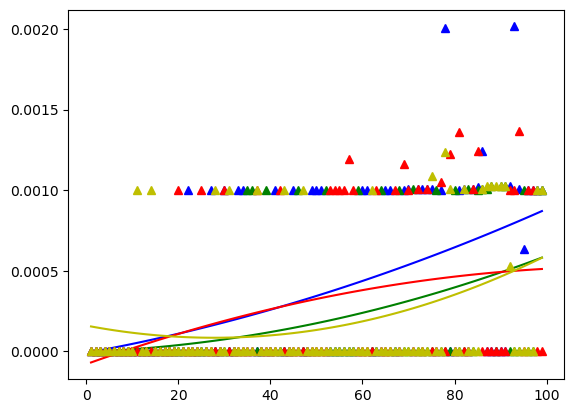

In [209]:
def mapping(x, a, b, c):
    return a * x**2 + b * x + c

args, _ = curve_fit(mapping, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, b, c = args[0], args[1], args[2]
y_fit = a * array(list(graph_val_1.keys()))**2 + b *array(list(graph_val_1.keys())) + c

print(a, 'x^2 + ', b, 'x + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'b')
plt.plot(graph_val_1.keys(), graph_val_1.values(), 'b^')

args, _ = curve_fit(mapping, array(list(graph_val_2.keys())), array(list(graph_val_2.values())))
a, b, c = args[0], args[1], args[2]
y_fit = a * array(list(graph_val_2.keys()))**2 + b *array(list(graph_val_2.keys())) + c

print(a, 'x^2 + ', b, 'x + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'g')
plt.plot(graph_val_2.keys(), graph_val_2.values(), 'g^')

args, _ = curve_fit(mapping, array(list(graph_val_3.keys())), array(list(graph_val_3.values())))
a, b, c = args[0], args[1], args[2]
y_fit = a * array(list(graph_val_3.keys()))**2 + b *array(list(graph_val_3.keys())) + c

print(a, 'x^2 + ', b, 'x + ', c, sep='')
plt.plot(array(list(graph_val_3.keys())), y_fit, 'r')
plt.plot(graph_val_3.keys(), graph_val_3.values(), 'r^')

args, _ = curve_fit(mapping, array(list(graph_val_4.keys())), array(list(graph_val_4.values())))
a, b, c = args[0], args[1], args[2]
y_fit = a * array(list(graph_val_4.keys()))**2 + b *array(list(graph_val_4.keys())) + c

print(a, 'x^2 + ', b, 'x + ', c, sep='')
plt.plot(array(list(graph_val_4.keys())), y_fit, 'y')
plt.plot(graph_val_4.keys(), graph_val_4.values(), 'y^')
print(graph_val_4[99])

9.538605071340972e-08x^(4/3) + 0.19978743680197522
9.886325509419324e-08x^(4/3) + 0.18753808535824695
8.88383801339348e-08x^(4/3) + 0.16241810171548143
1.1280061483997528e-07x^(4/3) + 0.13996216753416768


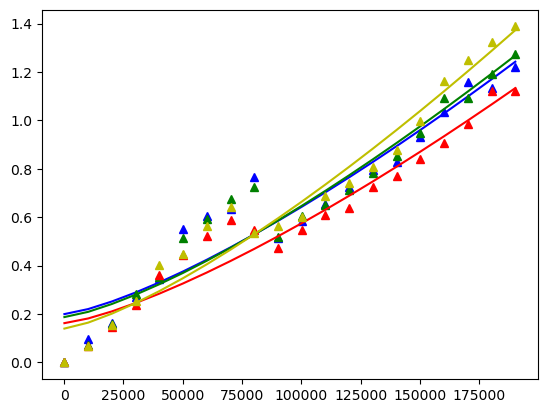

In [156]:
def mapping(x, a, c):
    return a * x**(4/3) + c

args, _ = curve_fit(mapping, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_1.keys()))**(4/3) + c

print(a, 'x^(4/3) + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'b')
plt.plot(graph_val_1.keys(), graph_val_1.values(), 'b^')

args, _ = curve_fit(mapping, array(list(graph_val_2.keys())), array(list(graph_val_2.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_2.keys()))**(4/3) + c

print(a, 'x^(4/3) + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'g')
plt.plot(graph_val_2.keys(), graph_val_2.values(), 'g^')

args, _ = curve_fit(mapping, array(list(graph_val_3.keys())), array(list(graph_val_3.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_3.keys()))**(4/3) + c

print(a, 'x^(4/3) + ', c, sep='')
plt.plot(array(list(graph_val_3.keys())), y_fit, 'r')
plt.plot(graph_val_3.keys(), graph_val_3.values(), 'r^')

args, _ = curve_fit(mapping, array(list(graph_val_4.keys())), array(list(graph_val_4.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_4.keys()))**(4/3) + c

print(a, 'x^(4/3) + ', c, sep='')
plt.plot(array(list(graph_val_4.keys())), y_fit, 'y')

plt.plot(graph_val_4.keys(), graph_val_4.values(), 'y^')

1.094634047465485e-08x^1.5 + 0.026603583398559182
1.8474903966325855e-08x^1.5 + 0.050416377861991574
1.7684391214474526e-08x^1.5 + 0.045723616528904304
3.1192634187762484e-08x^1.5 + 0.08565083382292837


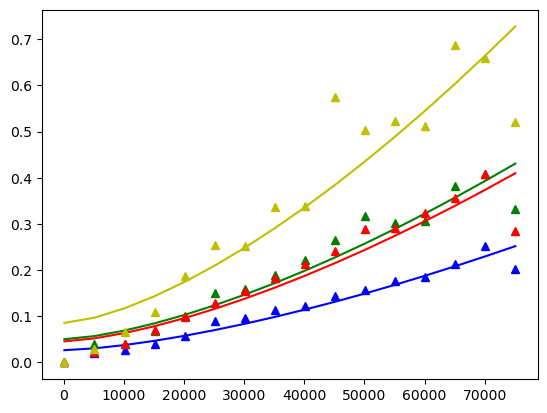

In [149]:
def mapping(x, a, c):
    return a * x**(1.5) + c

args, _ = curve_fit(mapping, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_1.keys()))**(1.5) + c

print(a, 'x^1.5 + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'b')
plt.plot(graph_val_1.keys(), graph_val_1.values(), 'b^')

args, _ = curve_fit(mapping, array(list(graph_val_2.keys())), array(list(graph_val_2.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_2.keys()))**(1.5) + c

print(a, 'x^1.5 + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'g')
plt.plot(graph_val_2.keys(), graph_val_2.values(), 'g^')

args, _ = curve_fit(mapping, array(list(graph_val_3.keys())), array(list(graph_val_3.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_3.keys()))**(1.5) + c

print(a, 'x^1.5 + ', c, sep='')
plt.plot(array(list(graph_val_3.keys())), y_fit, 'r')
plt.plot(graph_val_3.keys(), graph_val_3.values(), 'r^')

args, _ = curve_fit(mapping, array(list(graph_val_4.keys())), array(list(graph_val_4.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_4.keys()))**(1.5) + c

print(a, 'x^1.5 + ', c, sep='')
plt.plot(array(list(graph_val_4.keys())), y_fit, 'y')

plt.plot(graph_val_4.keys(), graph_val_4.values(), 'y^')

4.589490625135438e-05xlog(x) + -0.416502659736564
1.6772689631588409e-06xlog(x) + -0.009002521757556213
3.3423294695600186e-05xlog(x) + -0.3067783093598037
1.3755880530286518e-07xlog(x) + 0.0029132983453185575


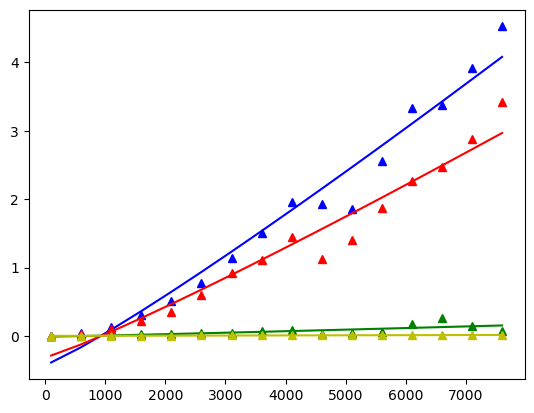

In [178]:
def mapping(x, a, c):
    return a * x * log2(x) + c

args, _ = curve_fit(mapping, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_1.keys())) * log2(array(list(graph_val_1.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'b')
plt.plot(graph_val_1.keys(), graph_val_1.values(), 'b^')

args, _ = curve_fit(mapping, array(list(graph_val_2.keys())), array(list(graph_val_2.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_2.keys())) * log2(array(list(graph_val_2.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
plt.plot(array(list(graph_val_2.keys())), y_fit, 'g')
plt.plot(graph_val_2.keys(), graph_val_2.values(), 'g^')

args, _ = curve_fit(mapping, array(list(graph_val_3.keys())), array(list(graph_val_3.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_3.keys())) * log2(array(list(graph_val_3.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
plt.plot(array(list(graph_val_3.keys())), y_fit, 'r')
plt.plot(graph_val_3.keys(), graph_val_3.values(), 'r^')

args, _ = curve_fit(mapping, array(list(graph_val_4.keys())), array(list(graph_val_4.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_4.keys())) * log2(array(list(graph_val_4.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
plt.plot(array(list(graph_val_4.keys())), y_fit, 'y')

plt.plot(graph_val_4.keys(), graph_val_4.values(), 'y^')

In [108]:
import sys

def print_array(array):
    if len(array) > 100:
        print("Первые 100 элементов массива:")
        print(array[:101])
    else: print(array)

array = []

while True:
    print("1. Добавить 1 элемент в массив", "2. Добавить 10 случайных элементов в массив",
         "3. Добавить 100 случайных элементов в массив", "4. Добавить 1000 случайных элементов в массив", sep='\n')
    button = input()
    if button == '1':
        print("Введите число:")
        array.append(int(input())) 
        print_array(array)
    elif button == '2':
        for _ in range(10):
            array.append(randint(1, 1000))
        print_array(array)
    elif button == '3':
        for _ in range(100):
            array.append(randint(1, 1000))
        print_array(array)
    elif button == '4':
        for _ in range(1000):
            array.append(randint(1, 1000))
        print_array(array)
    else:
        print("Неверное значение")
    print("Продолжить добавление элементов? y/n")
    flag = input()
    if flag == 'n': break

sys.setrecursionlimit(len(array)**2)
while True:
    print("Выберите алгоритм сортировки:")
    print("1. Сортировка выбором", "2. Сортировка вставками", "3. Сортировка пузырьком", "4. Сортировка слиянием",
          "5. Быстрая сортировка", "6. Сортировка Шелла (Последовательность Сэджвика)", "7. Сортировка Шелла (Последовательность Хиббарда)",
          "8. Сортировка Шелла (Классическая последовательность)", "9. Пирамидальная сортировка", "10. Timsort", "11. IntroSort", sep='\n')
    button = input()
    if button == '1':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", selection_sort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '2':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", insertion_sort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '3':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", bubble_sort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '4':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", merge_sort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '5':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", quick_sort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '6':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", shell_sort_s(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '7':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", shell_sort_x(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '8':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", shell_sort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '9':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", heap_sort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '10':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", timsort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    elif button == '11':
        start = time.time()
        print("До 100 первых элементов отсортированного массива:", introsort(array)[:101], sep='\n')
        end = time.time()
        print("Время работы:", end - start, "s")
    else:
        print("Неверное значение")
    print("Желаете повторить? y/n")
    flag = input()
    if flag == 'n': break

1. Добавить 1 элемент в массив
2. Добавить 10 случайных элементов в массив
3. Добавить 100 случайных элементов в массив
4. Добавить 1000 случайных элементов в массив
4
Первые 100 элементов массива:
[552, 883, 665, 490, 739, 838, 512, 638, 166, 419, 735, 687, 173, 625, 533, 929, 584, 717, 992, 940, 744, 890, 329, 121, 419, 53, 869, 408, 783, 941, 534, 420, 1000, 94, 640, 596, 979, 505, 733, 469, 757, 185, 426, 781, 618, 316, 656, 660, 253, 904, 455, 181, 845, 630, 254, 669, 466, 545, 588, 864, 869, 910, 336, 874, 595, 813, 278, 778, 849, 301, 416, 265, 476, 855, 938, 101, 983, 574, 258, 595, 811, 817, 237, 986, 506, 953, 901, 115, 164, 608, 657, 525, 441, 763, 877, 210, 926, 56, 122, 760, 863]
Продолжить добавление элементов? y/n
n
Выберите алгоритм сортировки:
1. Сортировка выбором
2. Сортировка вставками
3. Сортировка пузырьком
4. Сортировка слиянием
5. Быстрая сортировка
6. Сортировка Шелла (Последовательность Сэджвика)
7. Сортировка Шелла (Последовательность Хиббарда)
8. Сортировка 

In [17]:
average_values = {}

In [16]:
import sys
sys.setrecursionlimit(10000000)

graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(4000, 240000 , 20000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    merge_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    merge_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    merge_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    merge_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

In [74]:
average_values.update({'introsort' : graph_val_4})

1.7278218226718364e-07xlog(x) + 0.11983379426061783
2.0383311082585728e-07xlog(x) + 0.11181665051054106
1.8367740347878296e-07xlog(x) + 0.09243415508870055
2.1802391708340798e-07xlog(x) + 0.12103471453405172


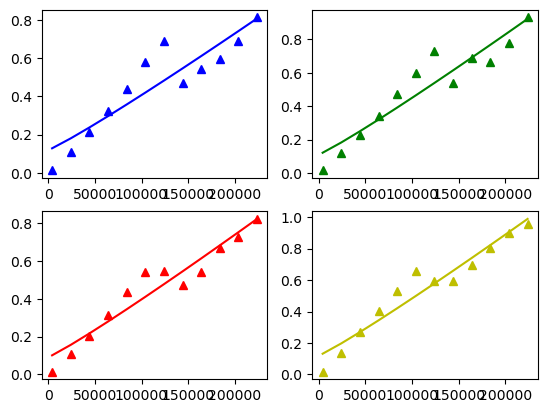

In [17]:
def mapping(x, a, b, c):
    return a * x**2 + b * x + c
def mapping2(x, a, b,):
    return a * x + b
def mapping3(x, a, c):
    return a * x * log2(x) + c
def mapping4(x, a, c):
    return a * x**(4/3) + c

fig, axs = plt.subplots(nrows=2, ncols=2)

args, _ = curve_fit(mapping3, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_1.keys())) * log2(array(list(graph_val_1.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
axs[0, 0].plot(array(list(graph_val_1.keys())), y_fit, 'b')
axs[0, 0].plot(graph_val_1.keys(), graph_val_1.values(), 'b^')

args, _ = curve_fit(mapping3, array(list(graph_val_2.keys())), array(list(graph_val_2.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_2.keys())) * log2(array(list(graph_val_2.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
axs[0, 1].plot(array(list(graph_val_1.keys())), y_fit, 'g')
axs[0, 1].plot(graph_val_2.keys(), graph_val_2.values(), 'g^')

args, _ = curve_fit(mapping3, array(list(graph_val_3.keys())), array(list(graph_val_3.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_3.keys())) * log2(array(list(graph_val_3.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
axs[1, 0].plot(array(list(graph_val_3.keys())), y_fit, 'r')
axs[1, 0].plot(graph_val_3.keys(), graph_val_3.values(), 'r^')

args, _ = curve_fit(mapping3, array(list(graph_val_4.keys())), array(list(graph_val_4.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_4.keys())) * log2(array(list(graph_val_4.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
axs[1, 1].plot(array(list(graph_val_4.keys())), y_fit, 'y')
axs[1, 1].plot(graph_val_4.keys(), graph_val_4.values(), 'y^')

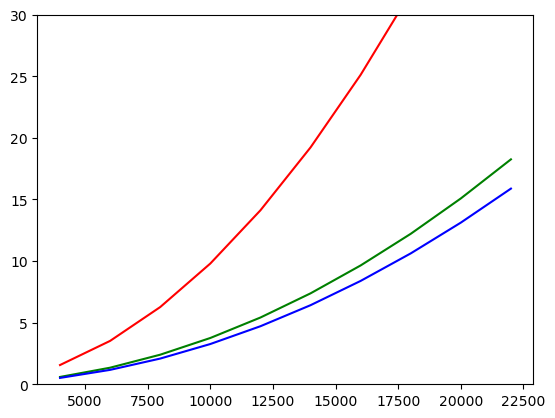

In [89]:
plt.ylim(0,30)

args, _ = curve_fit(mapping, array(list(average_values['selection_sort'].keys())), array(list(average_values['selection_sort'].values())))
a, c = args[0], args[1]
y_fit = a * array(list(average_values['selection_sort'].keys()))**2 + b *array(list(average_values['selection_sort'].keys())) + c
plt.plot(array(list(average_values['selection_sort'].keys())), y_fit, 'g')

args, _ = curve_fit(mapping, array(list(average_values['insertion_sort'].keys())), array(list(average_values['insertion_sort'].values())))
a, c = args[0], args[1]
y_fit = a * array(list(average_values['insertion_sort'].keys()))**2 + b *array(list(average_values['insertion_sort'].keys())) + c
plt.plot(array(list(average_values['insertion_sort'].keys())), y_fit, 'b')

args, _ = curve_fit(mapping, array(list(average_values['bubble_sort'].keys())), array(list(average_values['bubble_sort'].values())))
a, c = args[0], args[1]
y_fit = a * array(list(average_values['bubble_sort'].keys()))**2 + b *array(list(average_values['bubble_sort'].keys())) + c
plt.plot(array(list(average_values['bubble_sort'].keys())), y_fit, 'r')

In [3]:
graph_val_1 = {100 : 54000,
1000 : 168300,
2000 : 430000,
3000 : 474400,
4000 : 599600,
5000 : 742800,
6000 : 1277500,
7000 : 1678800,
8000 : 1307700,
9000 : 2086000}

2.1892657101993382x**(3/2) + 112887.81338645815


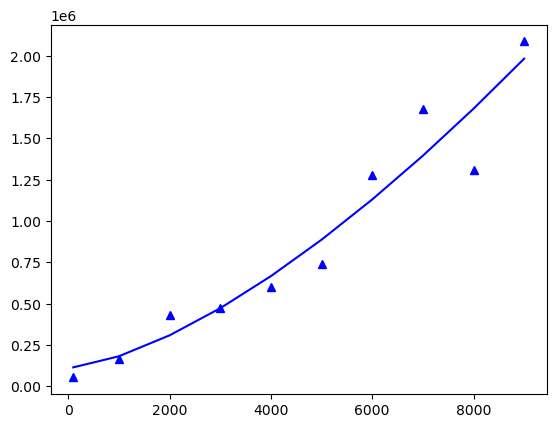

In [4]:
def mapping4(x, a, c):
    return a * x**(3/2) + c

args, _ = curve_fit(mapping4, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_1.keys())) ** (3/2) + c

print(a, 'x**(3/2) + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'b')
plt.plot(graph_val_1.keys(), graph_val_1.values(), 'b^')

In [5]:
graph_val_1 = {100 : 15000,
1000 : 118200,
2000 : 202900,
3000 : 394000,
4000 : 909600,
5000 : 1108400,
6000 : 710100,
7000 : 1348400,
8000 : 1325600,
9000 : 1624600}

13.604141337973301xlog(x) + 9522.254807303403


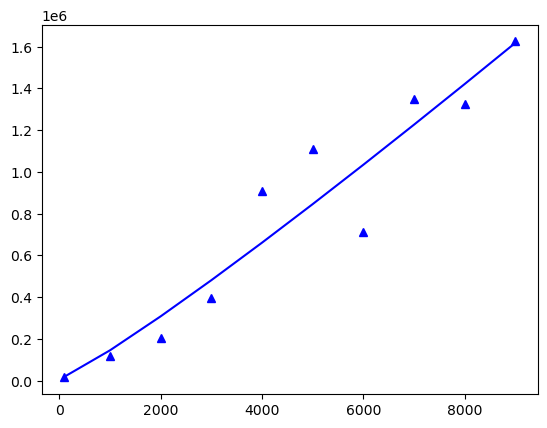

In [6]:
def mapping(x, a, c):
    return a * x * log2(x) + c

args, _ = curve_fit(mapping, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_1.keys())) * log2(array(list(graph_val_1.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
plt.plot(array(list(graph_val_1.keys())), y_fit, 'b')
plt.plot(graph_val_1.keys(), graph_val_1.values(), 'b^')